<a href="https://colab.research.google.com/github/maverick98/CDS/blob/main/Module6ProgrammingQuestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section II: Coding and Programming problems: (50 marks)
Read the monthly car sales data from Jan 1960 to Dec 1968. Download the data and import the
necessary packages as given below.
!wget -qq https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
car_sales = pd.read_csv("monthly-car-sales.csv")

Now answer the following: [5 X 10]
a. Plot the time series and comment on the trend and seasonality.
b. Determine the stationarity of the time series using a suitable test.
c. Make the series stationary by using log transformation and/or appropriate differencing.
Then test if the time series is stationary using a suitable test.
d. Plot the ACF and PACF of the time series. Do you observe seasonality? If yes, at what
lag? Use it as the ‘s’ value in sub-question e below.
e. Using the function:
sm.tsa.statespace.SARIMAX(log_car_sales, order=(p,d,q), seasonal_order=(P,D,Q,s))
try the following models with appropriate values of d, D and s:
i. p=2, q=0, P=2, Q=0
ii. p=2, q=1, P=2, Q=1
iii. p=2,q=2,P=2,Q=2

Which amongst the (i), (ii) and (iii) will you pick, Why ?

In [2]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv

--2023-03-24 06:08:53--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1834 (1.8K) [text/plain]
Saving to: ‘monthly-car-sales.csv’

monthly-car-sales.c 100%[===================>]   1.79K  --.-KB/s    in 0s      

2023-03-24 06:08:53 (37.8 MB/s) - ‘monthly-car-sales.csv’ saved [1834/1834]



In [3]:
import warnings
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
car_sales = pd.read_csv("monthly-car-sales.csv",
parse_dates=['Month'], index_col='Month')
car_sales.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


**a. Plot the time series and comment on the trend and seasonality.**

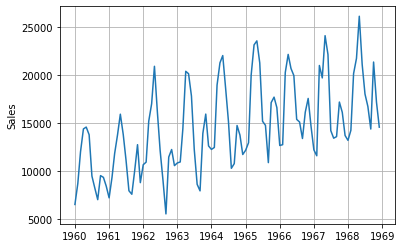

In [5]:
plt.plot(car_sales['Sales'])
plt.ylabel('Sales')
plt.grid()
plt.show()

**# Decomposition of time series**

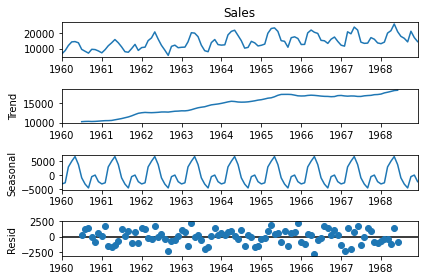

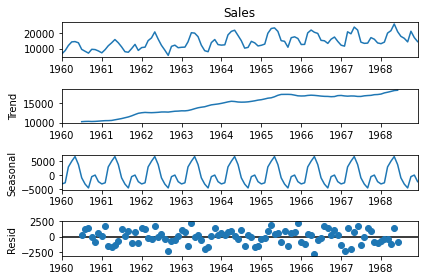

In [7]:
result = seasonal_decompose(car_sales['Sales'])
result.plot()

**b. Determine the stationarity of the time series using a suitable test.**

In [8]:
def get_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    # Rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

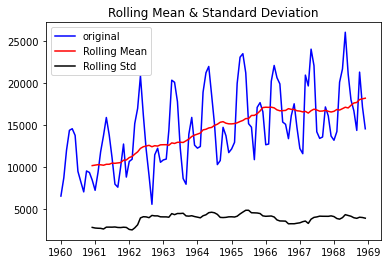

In [9]:
# Check for stationarity of original time series
get_stationarity(car_sales['Sales'])

In the above plot we can see the variation in rolling standard deviation and mean.

**c. Make the series stationary by using log transformation and/or appropriate differencing.
Then test if the time series is stationary using a suitable test.** 

As the variance of the time series is not stable, we should apply the logtransformation to
bring it in more suitable form.

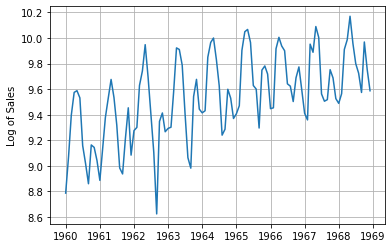

In [10]:
car_sales['Log'] = np.log(car_sales['Sales'])
plt.plot(car_sales['Log'])
plt.ylabel('Log of Sales')
plt.grid()
plt.show()

# Check for stationarity

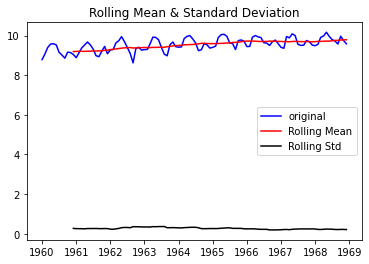

In [11]:
get_stationarity(car_sales['Log'])

# Check for stationarity
get_stationarity(car_sales['Log'])
In the above plot, the variation in rolling standard deviation is stabilized.
We can also perform the Augmented Dickey Fuller test to check for stationarity.

In [12]:
def test_p_value(data):
    """" Return Data is stationarity if pvalue <= 0.05 """
    fuller_test = adfuller(data)
    print('P-value: ', fuller_test[1])
    if fuller_test[1] <= 0.05:
        print('Reject null hypothesis, data is stationarity')
    else:
        print('Do not reject null hypothesis, data is not    stationarity')
# ADF test for Log-transformed series
test_p_value(car_sales['Log'])

P-value:  0.5569013671269574
Do not reject null hypothesis, data is not    stationarity


From the above results we can say that, although the variance has been stabilized, the log-
transformed time series is still non-stationary.
Aplying differencing:

In [14]:
# First differencing
car_sales['First_diff'] = car_sales['Log'].diff()

# Check stationarity
test_p_value(car_sales['First_diff'].fillna(0))

P-value:  0.0005924030936201804
Reject null hypothesis, data is stationarity


Now, the time series is stationary

**d. Plot the ACF and PACF of the time series. Do you observe seasonality? If yes, at what lag?
Use it as the ‘s’ value in sub-question (e) below.**
# Visualize PACF and ACF plots**

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


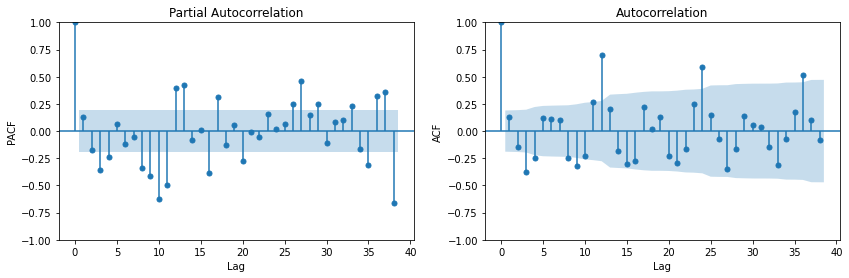

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
fig = plot_pacf(car_sales['First_diff'].dropna(), lags=38, ax=ax[0])
ax[0].set_xlabel("Lag")
ax[0].set_ylabel('PACF')
fig = plot_acf(car_sales['First_diff'].dropna(), lags=38, ax=ax[1])
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("ACF")
plt.show()

From the above Autocorrelation plot, we can observe the seasonality. The ACF values at
lags 12, 24, 36 are high, therefore s = 12.

**e. Using the function:**

sm.tsa.statespace.SARIMAX(log_car_sales, order=(p,d,q), seasonal_order=(P,D,Q,s))
try the following models with appropriate values of d, D and s:
i. p=2, q=0, P=2, Q=0

In [16]:
# Seasonal differenced time series
car_sales['Seasonal_diff'] = car_sales['First_diff'].diff(12)
test_p_value(car_sales['Seasonal_diff'].dropna())

P-value:  0.007583922105349087
Reject null hypothesis, data is stationarity


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


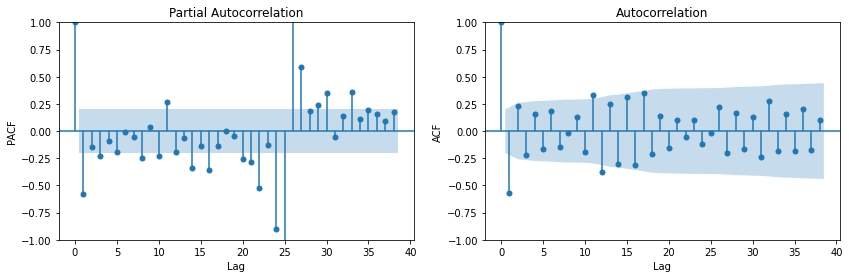

In [17]:
# Visualize PACF and ACF plots of seasonal differenced time series
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
fig = plot_pacf(car_sales['Seasonal_diff'].dropna(), lags=38,
ax=ax[0])
ax[0].set_xlabel("Lag")
ax[0].set_ylabel('PACF')
fig = plot_acf(car_sales['Seasonal_diff'].dropna(), lags=38, ax=ax[1])
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("ACF")
plt.show()

In [18]:
# p = 2, q = 0, P = 2, Q = 0
p = 2
q = 0
d = 1
P = 2
Q = 0
D = 1
s = 12
model = sm.tsa.statespace.SARIMAX(car_sales['Log'], order=(p, d, q),
seasonal_order= (P, D, Q, s))
results = model.fit()
print('ARIMA{}x{} - AIC:{}'.format((p, d, q), (P, D, Q), results.aic))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(2, 1, 0) - AIC:-118.10417541754691


In [19]:
# p = 2, q = 0, P = 2, Q = 1
p = 2
q = 0
d = 1
P = 2
Q = 1
D = 1
s = 12
model = sm.tsa.statespace.SARIMAX(car_sales['Log'], order=(p, d, q),
seasonal_order= (P, D, Q, s))
results = model.fit()
print('ARIMA{}x{} - AIC:{}'.format((p, d, q), (P, D, Q), results.aic))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(2, 1, 1) - AIC:-116.11466934850873


In [20]:
# p = 2, q = 2, P = 2, Q = 2
p = 2
q = 2
d = 1
P = 2
Q = 2
D = 1
s = 12
model = sm.tsa.statespace.SARIMAX(car_sales['Log'], order=(p, d, q),
seasonal_order= (P, D, Q, s))
results = model.fit()
print('ARIMA{}x{} - AIC:{}'.format((p, d, q), (P, D, Q), results.aic))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


ARIMA(2, 1, 2)x(2, 1, 2) - AIC:-125.89540941974022


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Which amongst the (i), (ii) and (iii) will you pick, Why ?**

Model with lower AIC score will be considered.